# Principal Component Analysis

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [2]:
fname_data  = 'assignment_12_data.txt'
feature0    = np.genfromtxt(fname_data, delimiter=',')

number_data     = np.size(feature0, 0)
number_feature  = np.size(feature0, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 50
number of feature : 2


## plot the input data

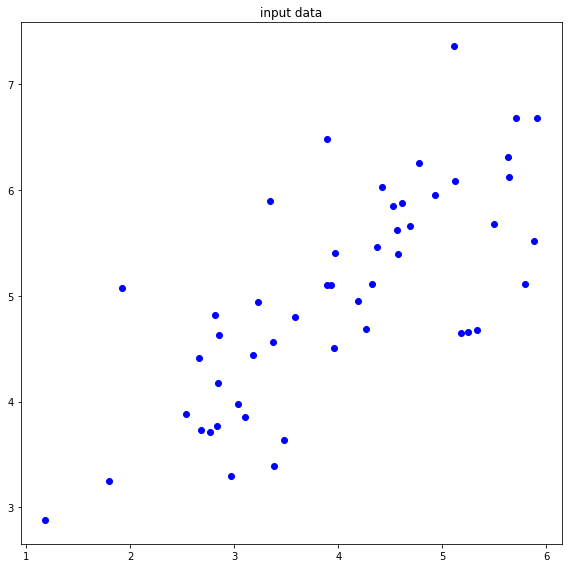

In [3]:
plt.figure(figsize=(8,8))   
plt.title('input data')

x0 = feature0[:,0]
y0 = feature0[:,1]

plt.scatter(x0, y0, color='blue')

plt.tight_layout()
plt.show()

## Normalization (Z-scoring)
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [4]:
x0

array([3.38156, 4.52788, 2.65568, 2.76523, 2.84656, 3.89067, 3.47581,
       5.9113 , 3.92889, 4.56184, 4.57407, 4.37173, 4.19169, 5.24409,
       2.83584, 5.63527, 4.68633, 2.85051, 5.11016, 5.18256, 5.70733,
       3.57968, 5.63938, 4.26347, 2.53652, 3.22383, 4.92949, 5.79296,
       2.81685, 3.88882, 3.34323, 5.87973, 3.10392, 5.33151, 3.37543,
       4.77668, 2.67575, 5.50028, 1.7971 , 4.32251, 4.421  , 3.1793 ,
       3.03354, 4.60935, 2.96379, 3.97176, 1.18023, 1.91895, 3.95525,
       5.11795])

In [5]:
np.mean(x0)

3.9892652

In [6]:
np.std(x0)

1.161260585149156

In [7]:
(3.38156-3.9892652)/np.std(x0)

-0.523315100651543

In [13]:
x

array([-0.5233151 ,  0.46381907, -1.14839444, -1.0540573 , -0.98402134,
       -0.0849036 , -0.4421533 ,  1.65512791, -0.05199109,  0.49306315,
        0.50359481,  0.32935312,  0.17431471,  1.08057125, -0.99325269,
        1.41742932,  0.60026562, -0.98061987,  0.96523968,  1.02758572,
        1.47948257, -0.3527074 ,  1.42096858,  0.23612685, -1.25100707,
       -0.65914163,  0.80965876,  1.55322141, -1.00960561, -0.08649669,
       -0.55632233,  1.62794193, -0.76240011,  1.15585151, -0.52859385,
        0.678069  , -1.1311115 ,  1.30118495, -1.88774615,  0.28696815,
        0.37178115, -0.69748789, -0.82300666,  0.53397558, -0.8830707 ,
       -0.01507431, -2.41895336, -1.78281708, -0.02929162,  0.97194791])

In [9]:
def normalize(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    feature_normalize = np.zeros((number_data, number_feature), dtype = np.float64)
    feature_normalize[:, 0] = (x0 - np.mean(x0)) / np.std(x0)
    feature_normalize[:, 1] = (y0 - np.mean(y0)) / np.std(y0)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return feature_normalize

In [10]:
feature = normalize(feature0)

x   = feature[:, 0]
y   = feature[:, 1]

min_x = np.min(x)
min_y = np.min(y)

max_x = np.max(x)
max_y = np.max(y)

In [11]:
min_x

-2.418953364923859

In [12]:
np.mean(x)

-1.509903313490213e-16

## compute covariance matrix
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [14]:
np.cov(feature.T)

array([[1.02040816, 0.75054082],
       [0.75054082, 1.02040816]])

In [15]:
sam = np.zeros((2,2))

In [16]:
feature[:,0]

array([-0.5233151 ,  0.46381907, -1.14839444, -1.0540573 , -0.98402134,
       -0.0849036 , -0.4421533 ,  1.65512791, -0.05199109,  0.49306315,
        0.50359481,  0.32935312,  0.17431471,  1.08057125, -0.99325269,
        1.41742932,  0.60026562, -0.98061987,  0.96523968,  1.02758572,
        1.47948257, -0.3527074 ,  1.42096858,  0.23612685, -1.25100707,
       -0.65914163,  0.80965876,  1.55322141, -1.00960561, -0.08649669,
       -0.55632233,  1.62794193, -0.76240011,  1.15585151, -0.52859385,
        0.678069  , -1.1311115 ,  1.30118495, -1.88774615,  0.28696815,
        0.37178115, -0.69748789, -0.82300666,  0.53397558, -0.8830707 ,
       -0.01507431, -2.41895336, -1.78281708, -0.02929162,  0.97194791])

In [17]:
0.5233151**2

0.27385869388801004

In [18]:
np.mean(feature[:, 0]**2)

0.9999999999999999

In [19]:
np.shape(feature[:,0])

(50,)

In [20]:
np.inner(feature[:,0], feature[:,1]) / number_data

0.7355300038440324

In [21]:
sam[0,0] = np.mean(feature[:, 0]**2)
sam[0,1] = np.inner(feature[:,0], feature[:,1]) / number_data
sam[1,0] = np.inner(feature[:,0], feature[:,1]) / number_data
sam[1,1] = np.mean(feature[:, 1]**2)

In [22]:
sam

array([[1.     , 0.73553],
       [0.73553, 1.     ]])

In [23]:
np.cov(feature[:,0],feature[:,1])

array([[1.02040816, 0.75054082],
       [0.75054082, 1.02040816]])

In [61]:
np.mean(feature[:,0],dtype=float)

-1.509903313490213e-16

In [126]:
np.linalg.eig(np.corrcoef(feature0.T))

(array([1.73553, 0.26447]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [118]:
np.linalg.eig(np.cov(feature.T))

(array([1.77094898, 0.26986734]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [122]:
np.corrcoef(feature0.T) == compute_covariance(feature)

array([[False,  True],
       [False,  True]])

In [120]:
np.linalg.eig(compute_covariance(feature))

(array([0.26447, 1.73553]),
 array([[-0.70710678, -0.70710678],
        [ 0.70710678, -0.70710678]]))

In [139]:
compute_covariance(feature) == np.corrcoef(feature0.T)

array([[False,  True],
       [False,  True]])

In [142]:
np.corrcoef(feature0.T, dtype= np.float64)[0,0]

1.0

In [150]:
np.atleast_2d(np.cov(feature.T))

array([[1.02040816, 0.75054082],
       [0.75054082, 1.02040816]])

In [149]:
np.corrcoef(feature0.T)[1,0]

0.7355300038440323

In [148]:
compute_covariance(feature)[1,0]

0.7355300038440324

In [189]:
np.reshape(feature[0,:], (2,1))

array([[-0.5233151 ],
       [-1.59279489]])

In [183]:
feature[0,:].transpose()

array([-0.5233151 , -1.59279489])

In [179]:
np.shape(feature[0])

(2,)

In [169]:
np.matmul(feature[0,:], feature[0,:])

2.8108542685597264

In [195]:
np.linalg.eig(np.matmul(feature.T, feature) / np.shape(feature)[0])

(array([1.73553, 0.26447]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [203]:
np.matmul(feature.T, feature) / np.shape(feature)[0]

array([[1.     , 0.73553],
       [0.73553, 1.     ]])

In [140]:
np.linalg.eig(compute_covariance(feature))

(array([0.26447, 1.73553]),
 array([[-0.70710678, -0.70710678],
        [ 0.70710678, -0.70710678]]))

In [204]:
def compute_covariance(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    Sigma = np.matmul(feature.T, feature) / np.shape(feature)[0]

    #Sigma = np.cov(feature.T)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return Sigma

## compute principal components
- `np.linalg.eig`
- `argsort()`
- return the eigenvalues and the eigenvectors in a decreasing order according to the eigenvalues

In [25]:
np.linalg.eig(sam)

(array([0.26447, 1.73553]),
 array([[-0.70710678, -0.70710678],
        [ 0.70710678, -0.70710678]]))

In [26]:
compute_covariance(feature)

array([[1.     , 0.73553],
       [0.73553, 1.     ]])

In [36]:
a, b = np.linalg.eig(compute_covariance(feature))
a

array([0.26447, 1.73553])

In [50]:
b

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [60]:
b.T

array([[-0.70710678,  0.70710678],
       [-0.70710678, -0.70710678]])

In [73]:
a, b =np.linalg.eig(sam)

In [76]:
c ,d = a.argsort()

In [47]:
np.argsort(a)[::-1]

array([1, 0])

In [55]:
a[a.argsort()[::-1]]

array([1.73553, 0.26447])

In [53]:
b[:,a.argsort()[::-1]][:,0]

array([-0.70710678, -0.70710678])

In [51]:
eigenvalues, eigenvectors = np.linalg.eig(compute_covariance(feature))

In [199]:
np.matmul(feature.T, feature) / np.shape(feature[0])

array([[25.       , 18.3882501],
       [18.3882501, 25.       ]])

In [52]:
eigenvalues

array([0.26447, 1.73553])

In [205]:
def compute_principal_component(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    eigenvalues, eigenvectors = np.linalg.eig(compute_covariance(feature))
    
    principal_component_1 = eigenvalues[eigenvalues.argsort()[::-1]][0] * eigenvectors[:,eigenvalues.argsort()[::-1]][:,0]
    principal_component_2 = eigenvalues[eigenvalues.argsort()[::-1]][1] * eigenvectors[:,eigenvalues.argsort()[::-1]][:,1]

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
     
    return (principal_component_1, principal_component_2)

In [206]:
compute_principal_component(feature)

(array([1.22720503, 1.22720503]), array([-0.18700853,  0.18700853]))

## compute the projection of point onto the axis
- `np.matmul`
- `np.dot`
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features
- shape of vector = $m \times 1$ where $m$ is the dimension of features

In [207]:
def compute_projection_onto_line(feature, vector):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    n = np.shape(feature)[0]
    m = np.shape(feature)[1]
    projection = np.zeros((n,m))

    for i in range(n):
        projection[i, :] = (np.dot(feature[i, :], vector) / np.sum(vector**2)) * vector

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return projection

In [62]:
np.shape(feature)[1]

2

## compute the principal components and the projection of feature

In [208]:

(principal_component_1, principal_component_2) = compute_principal_component(feature)

projection1 = compute_projection_onto_line(feature, principal_component_1)
projection2 = compute_projection_onto_line(feature, principal_component_2)

In [209]:
projection1

array([[-1.058055  , -1.058055  ],
       [ 0.6520829 ,  0.6520829 ],
       [-0.865779  , -0.865779  ],
       [-1.16238927, -1.16238927],
       [-0.90030097, -0.90030097],
       [ 0.69071439,  0.69071439],
       [-0.8971826 , -0.8971826 ],
       [ 1.65567919,  1.65567919],
       [ 0.02120705,  0.02120705],
       [ 0.55276016,  0.55276016],
       [ 0.44666233,  0.44666233],
       [ 0.39089012,  0.39089012],
       [ 0.06341096,  0.06341096],
       [ 0.37183804,  0.37183804],
       [-1.10602267, -1.10602267],
       [ 1.3548874 ,  1.3548874 ],
       [ 0.62705978,  0.62705978],
       [-0.67604566, -0.67604566],
       [ 1.64753055,  1.64753055],
       [ 0.33795229,  0.33795229],
       [ 1.56798978,  1.56798978],
       [-0.2750713 , -0.2750713 ],
       [ 1.26206331,  1.26206331],
       [-0.0365951 , -0.0365951 ],
       [-1.17741914, -1.17741914],
       [-0.35930365, -0.35930365],
       [ 0.87476969,  0.87476969],
       [ 0.82871892,  0.82871892],
       [-0.59553519,

---

---

## functions for presenting the results

---

---

In [65]:
def function_result_01():
   
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')
    plt.scatter(x, y, color='blue')

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [81]:
principal_component_2

array([-0.18700853,  0.18700853])

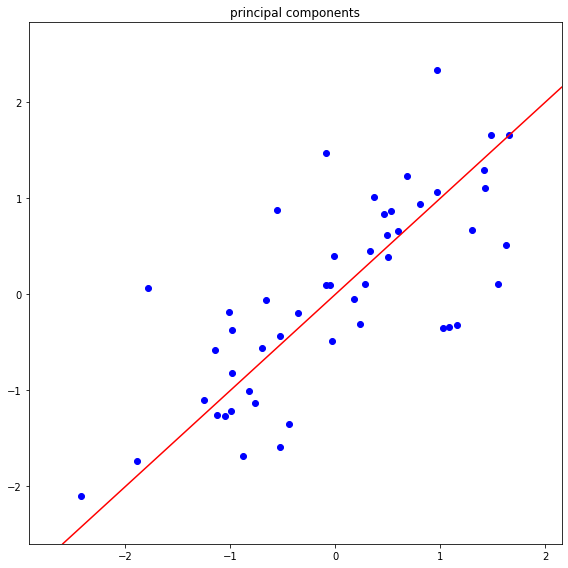

In [218]:
plt.figure(figsize=(8,8))
plt.title('principal components')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

plt.scatter(x, y, color='blue')
plt.axline((0,0), principal_component_1, color = 'r')
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

plt.xlim(min_x - 0.5, max_x + 0.5)
plt.ylim(min_y - 0.5, max_y + 0.5)

plt.tight_layout()
plt.show()

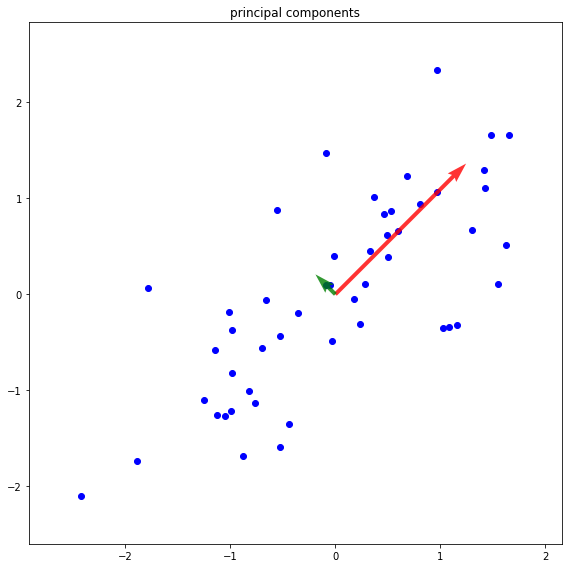

In [220]:
plt.figure(figsize=(8,8))
plt.title('principal components')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

plt.scatter(x, y, color='blue')
plt.quiver(0, 0, principal_component_1[0], principal_component_1[1], color='r', scale = 5, alpha = 0.8)
plt.quiver(0, 0, principal_component_2[0], principal_component_2[1], color='g', scale = 5, alpha = 0.8)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

plt.xlim(min_x - 0.5, max_x + 0.5)
plt.ylim(min_y - 0.5, max_y + 0.5)

plt.tight_layout()
plt.show()

In [66]:
def function_result_02():

    plt.figure(figsize=(8,8))
    plt.title('principal components')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.scatter(x, y, color='blue')
    plt.quiver(0, 0, principal_component_1[0], principal_component_1[1], color='r', scale = 5, alpha = 0.8)
    plt.quiver(0, 0, principal_component_2[0], principal_component_2[1], color='g', scale = 5, alpha = 0.8)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [217]:
principal_component_1

array([1.22720503, 1.22720503])

In [67]:
def function_result_03():

    plt.figure(figsize=(8,8))
    plt.title('first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.scatter(x, y, color='blue')
    plt.axline((0,0), principal_component_1, color = 'r')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [68]:
def function_result_04():

    plt.figure(figsize=(8,8))
    plt.title('second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.scatter(x, y, color='blue')
    plt.axline((0,0), principal_component_2, color = 'r')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

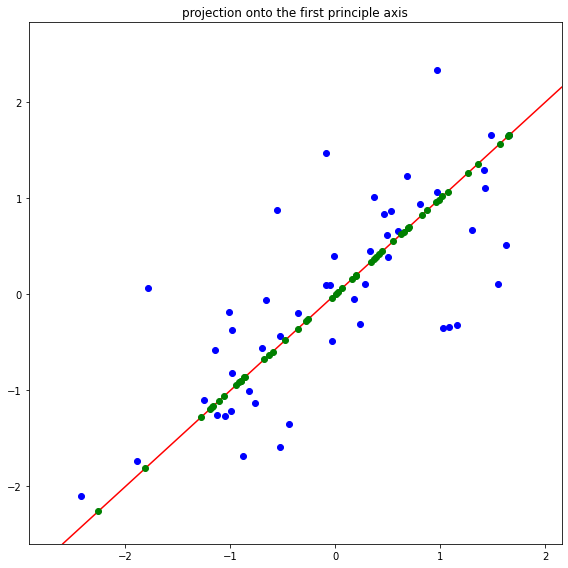

In [223]:
plt.figure(figsize=(8,8))
plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

plt.scatter(x, y, color='blue')
plt.axline((0,0), principal_component_1, color = 'r')
plt.plot(projection1[:, 0], projection1[:, 1], 'o', color = 'g')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

plt.xlim(min_x - 0.5, max_x + 0.5)
plt.ylim(min_y - 0.5, max_y + 0.5)

plt.tight_layout()
plt.show()

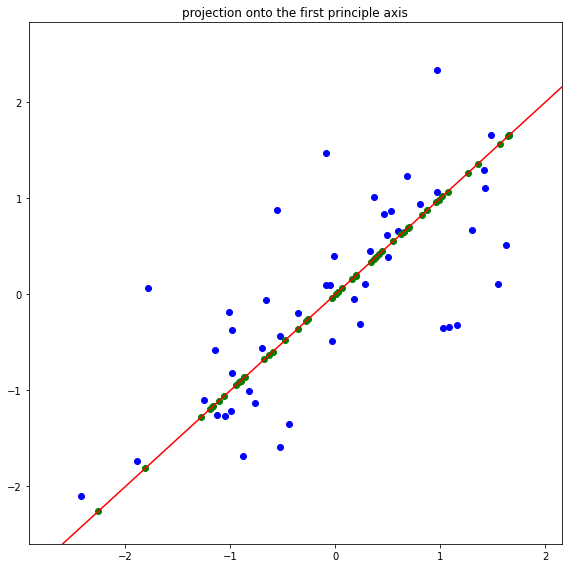

In [225]:
plt.figure(figsize=(8,8))
plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

plt.scatter(x, y, color='blue')
plt.axline((0,0), principal_component_1, color = 'r')
plt.scatter(projection1[:, 0], projection1[:, 1], color = 'g')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

plt.xlim(min_x - 0.5, max_x + 0.5)
plt.ylim(min_y - 0.5, max_y + 0.5)

plt.tight_layout()
plt.show()

In [69]:
def function_result_05():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.scatter(x, y, color='blue')
    plt.axline((0,0), principal_component_1, color = 'r')
    plt.plot(projection1[:, 0], projection1[:, 1], 'o', color = 'g')
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()


In [70]:
def function_result_06():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.scatter(x, y, color='blue')
    plt.axline((0,0), principal_component_2, color = 'r')
    plt.plot(projection2[:, 0], projection2[:, 1], 'o', color = 'g')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [ ]:
plt.figure(figsize=(8,8))
plt.title('projection onto the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

plt.scatter(x, y, color='blue')
plt.axline((0,0), principal_component_2, color = 'r')
plt.plot(projection2[:, 0], projection2[:, 1], 'o', color = 'g')
for i 

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

plt.xlim(min_x - 0.5, max_x + 0.5)
plt.ylim(min_y - 0.5, max_y + 0.5)

plt.tight_layout()
plt.show()

In [71]:
def function_result_07():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [72]:
def function_result_08():

    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************


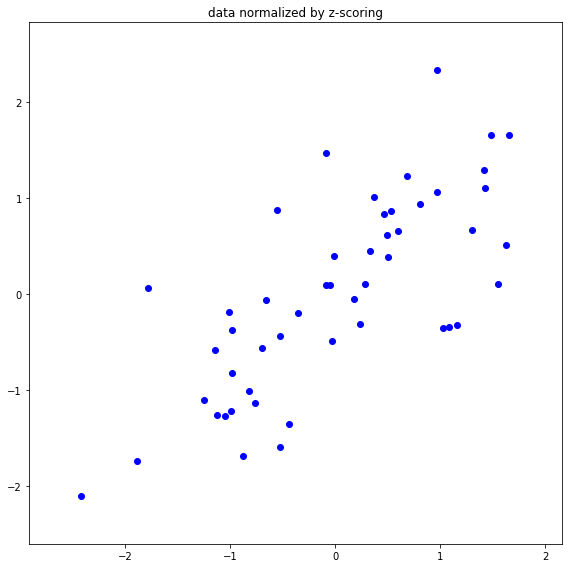

**************************************************
## [RESULT 02]
**************************************************


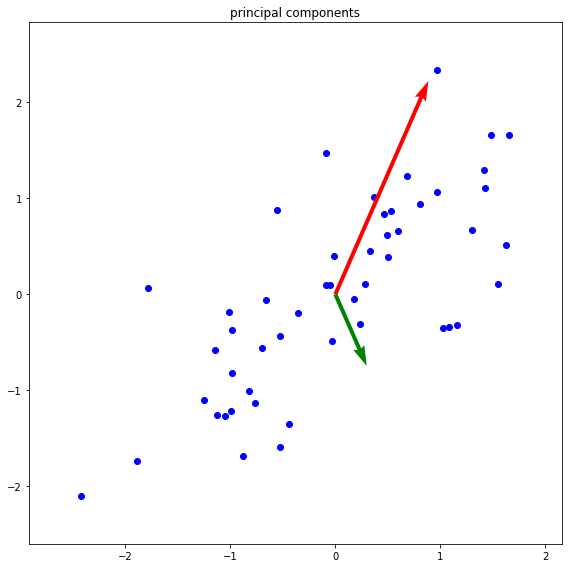

**************************************************
## [RESULT 03]
**************************************************


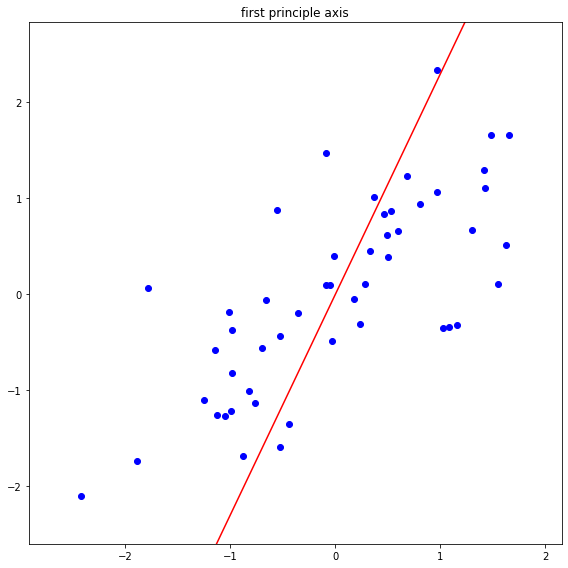

**************************************************
## [RESULT 04]
**************************************************


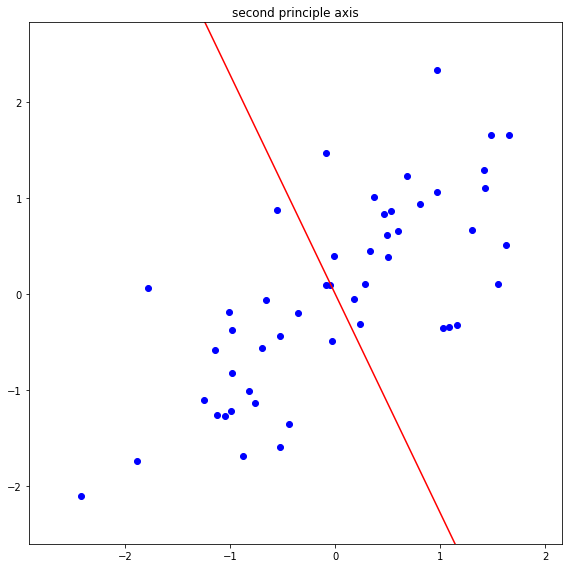

**************************************************
## [RESULT 05]
**************************************************


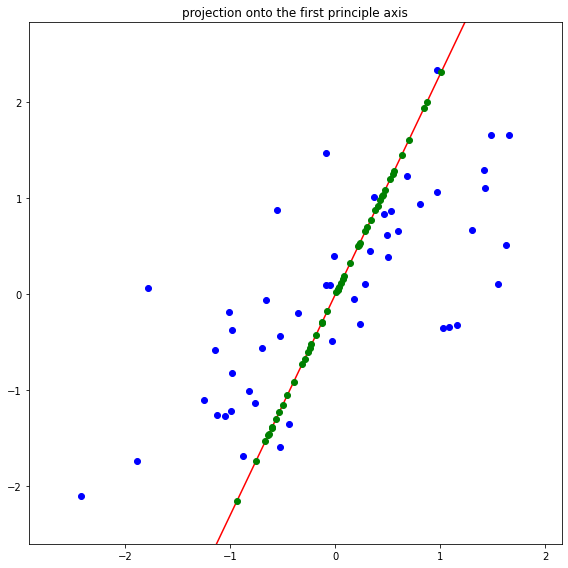

**************************************************
## [RESULT 06]
**************************************************


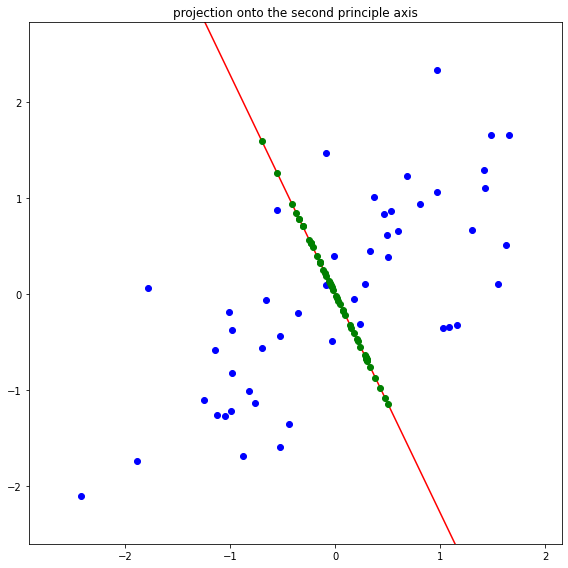

**************************************************
## [RESULT 07]
**************************************************


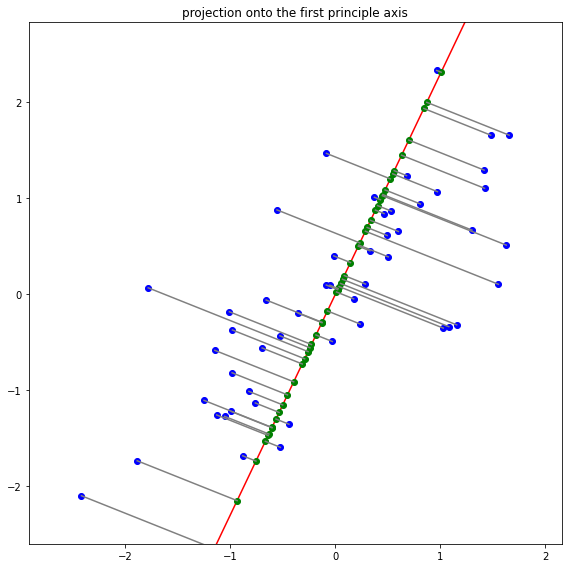

**************************************************
## [RESULT 08]
**************************************************


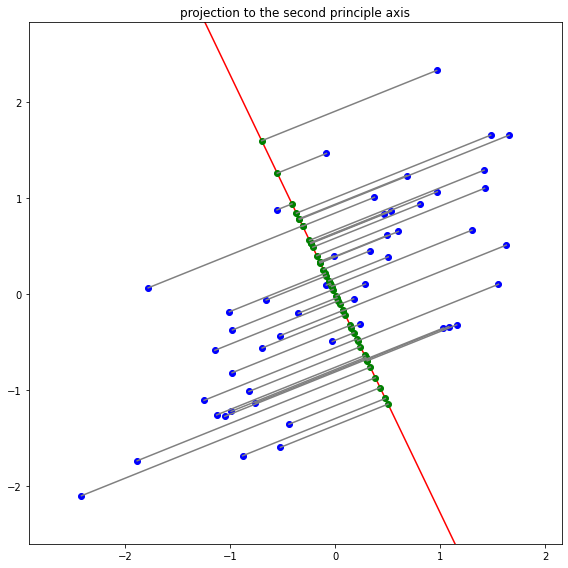

In [73]:
number_result = 8

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)